In [8]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ast
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [4]:
df = pd.read_csv('embeddings.csv')

In [83]:
df

,reviewID,embedding,flagged
0,GtwU21YOQn-wf4vWRUIx6w,"[-0.23913899064064026, 0.1283329278230667, 0.0...",0
1,0LpVTc3,"[0.10993178188800812, 0.10660126805305481, 0.0...",0
2,tljtLzf68Fkwf,"[0.17507007718086243, 0.03029392473399639, 0.1...",0
3,iSN,"[-0.07138868421316147, 0.185563325881958, 0.28...",0
4,Jmwrh7,"[0.048450715839862823, 0.22147926688194275, 0....",0
...,...,...,...
26951,PZu8sDx2T2,"[0.06812692433595657, 0.012743202969431877, 0....",0
26952,S-zbPPGoB,"[-0.19266746938228607, 0.0278228297829628, 0.2...",0
26953,roKqXYooTy49OMAIJJjf,"[0.09447625279426575, -0.1751326024532318, 0.0...",0
26954,FefmFaWa,"[0.2742891013622284, -0.14054079353809357, 0.0...",0


In [19]:
df['embedding'] = df['embedding'].apply(ast.literal_eval)

In [20]:
# Extract features and labels
X = df['embedding'].to_list()
y = df['flagged'].to_list()

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [50]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(X_train[0]),)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
337/337 [==============================] - 1s 2ms/step - loss: 0.5388 - accuracy: 0.7574 - val_loss: 0.5053 - val_accuracy: 0.7750
Epoch 2/100
337/337 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.7677 - val_loss: 0.5002 - val_accuracy: 0.7789
Epoch 3/100
337/337 [==============================] - 1s 2ms/step - loss: 0.4893 - accuracy: 0.7702 - val_loss: 0.5019 - val_accuracy: 0.7806
Epoch 4/100
337/337 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.7737 - val_loss: 0.4901 - val_accuracy: 0.7797
Epoch 5/100
337/337 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.7762 - val_loss: 0.4844 - val_accuracy: 0.7821
Epoch 6/100
337/337 [==============================] - 1s 2ms/step - loss: 0.4720 - accuracy: 0.7781 - val_loss: 0.4902 - val_accuracy: 0.7776
Epoch 7/100
337/337 [==============================] - 1s 2ms/step - loss: 0.4688 - accuracy: 0.7810 - val_loss: 0.4890 - val_accuracy: 0.7813

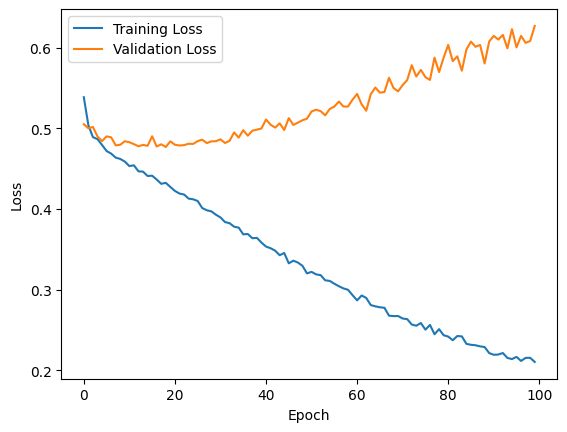

In [51]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can visualise that the validation loss starts to plateau or increases, while the training loss continues to decrease after around 20 epochs. This is a sign that the model is starting to overfit the training data, and further training may not result in better generalization to new, unseen data. Hence we would be selecting 20 as the number of epochs

In [52]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(X_train[0]),)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
337/337 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.7421 - val_loss: 0.4964 - val_accuracy: 0.7711
Epoch 2/20
337/337 [==============================] - 1s 2ms/step - loss: 0.5083 - accuracy: 0.7684 - val_loss: 0.4923 - val_accuracy: 0.7700
Epoch 3/20
337/337 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.7672 - val_loss: 0.4877 - val_accuracy: 0.7739
Epoch 4/20
337/337 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.7730 - val_loss: 0.4876 - val_accuracy: 0.7774
Epoch 5/20
337/337 [==============================] - 1s 2ms/step - loss: 0.4798 - accuracy: 0.7742 - val_loss: 0.4870 - val_accuracy: 0.7806
Epoch 6/20
337/337 [==============================] - 1s 2ms/step - loss: 0.4787 - accuracy: 0.7770 - val_loss: 0.4988 - val_accuracy: 0.7776
Epoch 7/20
337/337 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.7763 - val_loss: 0.4916 - val_accuracy: 0.7795
Epoch 

In [79]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test)

169/169 [==============================] - 0s 754us/step - loss: 0.4860 - accuracy: 0.7843
Test Loss: 0.48595884442329407, Test Accuracy: 0.7843101024627686
169/169 [==============================] - 0s 639us/step


In [84]:
predicted_labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [82]:
predicted_labels = np.round(predictions)

# Calculate additional metrics
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Display the metric table
print("Metric Table:")
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Metric Table:
Test Loss: 0.48595884442329407
Test Accuracy: 0.7843101024627686
Precision: 0.5939086294416244
Recall: 0.18916734033953111
F1 Score: 0.2869405272838749
